<a href="https://colab.research.google.com/github/abhay43/ML_Code/blob/master/DL-Denoising%3A%20using%20Conv2D%20Autoencoders%20using%20fashion%20mnist%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, MaxPooling2D, Input
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [10]:
noise_factor = .9
x_train_noisy  = x_train + noise_factor * np.random.normal(0, .5 , x_train.shape)
x_test_noisy  = x_test + noise_factor * np.random.normal(0, .5 , x_test.shape)

In [11]:
x_test_noisy, x_valid_noisy , x_test , x_valid_test = train_test_split(x_test_noisy, x_test , test_size=0.01)

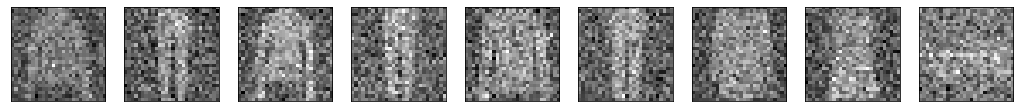

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:

input_img = Input(shape=(28,28,1))
x = Conv2D(32,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D( (2,2),padding='same')(x)
x = Conv2D(64, (3,3), activation = 'relu', padding='same')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding = 'same')(x)
#x = Conv2D(128, (3,3), activation = 'relu', padding='same')(x)
#encoded = MaxPooling2D(pool_size=(2,2), padding = 'same')(x)

# = Conv2D(128, (3,3), activation = 'relu', padding='same')(encoded)
#x = UpSampling2D((2,2))(x)
x = Conv2D(64, (3,3), activation = 'relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation = 'relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(inputs= input_img, outputs = decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0     

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3174 - val_loss: 0.2993
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2945 - val_loss: 0.2944
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2904 - val_loss: 0.2909
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2877 - val_loss: 0.2886
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2860 - val_loss: 0.2876
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2849 - val_loss: 0.2864
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2841 - val_loss: 0.2857
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2834 - val_loss: 0.2853
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2829 - val_loss: 0.2848
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2824 - val_loss: 0.2843

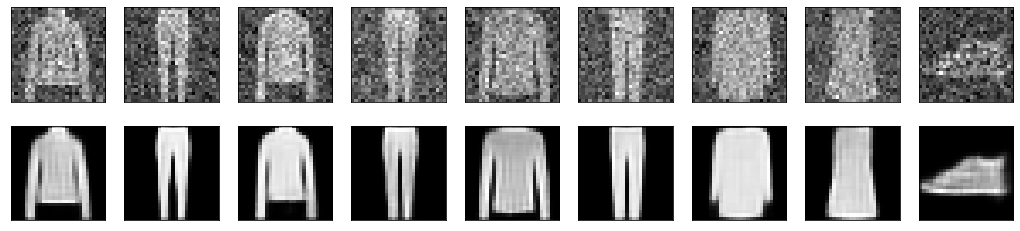

In [16]:
noise_factor = .5
x_valid_noisy  = x_test + noise_factor * np.random.normal(0, .5 , x_test.shape)
predicted_label = np.squeeze(autoencoder.predict(x_valid_noisy))
n = 10
plt.figure(figsize = (20,4))
for i in range(1, n):
  ax = plt.subplot(2, n , i+1)
  plt.imshow(x_valid_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n , i+1 +n)
  plt.imshow(predicted_label[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()